In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from common import *
from plotting import *

In [4]:
def filter_results(df, pattern) :
    return df.filter(regex=pattern, axis=0)

In [5]:
def get_results(data_name, evaluate) :
    yr_df = []
    for v in [0.001, 0.01, 0.1, 10.0, 100.0, 1.0] :
        name = os.path.join('outputs/', data_name, 'baselines'+(('_' + str(v)) if v != 1.0 else ''))
        if os.path.exists(name) :
            dirs = os.listdir(name)
            dfs = {}
            for d in sorted(dirs) :
                dirname = os.path.join(name, d)
                if os.path.isdir(dirname) :
                    if evaluate :
                        model_name = get_latest_model(dirname)
                    else :
                        model_name = get_latest_model_with_test(dirname)
                    if model_name is not None :
                        if evaluate :
                            df = json.load(open(os.path.join(model_name, 'evaluate.json')))
                        else :
                            df = json.load(open(os.path.join(model_name, 'test_evaluate.json')))
                        vals = {k:v+(0.002 if 'BinaryBOW' in d else 0.0) for k, v in df.items()}
                        vals['model'] = d
                        vals['C'] = v
                        vals['type'] = d.split('+')[1]
                        vals['norm'] = d.split('+')[2].split('=')[1] if len(d.split('+')) > 2 else None
                        vals['is_structured'] = '+Structured' in d
                        yr_df.append(vals)
    yr_df = pd.DataFrame(yr_df)
    print(len(yr_df))
    return yr_df

In [11]:
def generate_plot(data_name, key, evaluate=False, structured=True) :
    df = get_results(data_name, evaluate)
    if structured :
        df = df[df.is_structured ==True]
    print(len(df))
    df = df[(df.type.isin(['BOW', 'BinaryBOW', 'TFIDF'])) & df.norm.isin(['None', 'l1', 'l2'])]
    print(len(df))
    fig = sns.lineplot(x='C', y=key, hue='norm', style='type', style_order=['BOW', 'BinaryBOW', 'TFIDF'], ci=None, linewidth=2, data=df)
    plt.xscale('log')
    sns.despine()
    fig.axes.get_legend().remove()
    fig.axes.set_ylabel(fig.axes.get_ylabel().replace('_', ' ').upper())
    fig.figure.savefig('Text-encoding-EHR/results/' + data_name + '/LR_Hyperparam.pdf', bbox_inches='tight')
    plt.title(data_name)
    plt.show()
    return df, fig

87
60
54


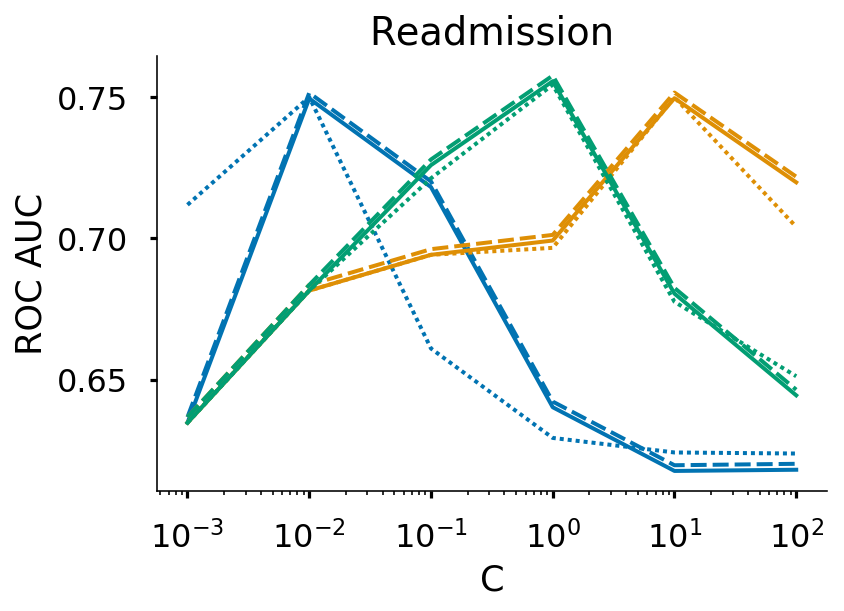

In [107]:
df, fig = generate_plot('Readmission', 'roc_auc')

87
60
54


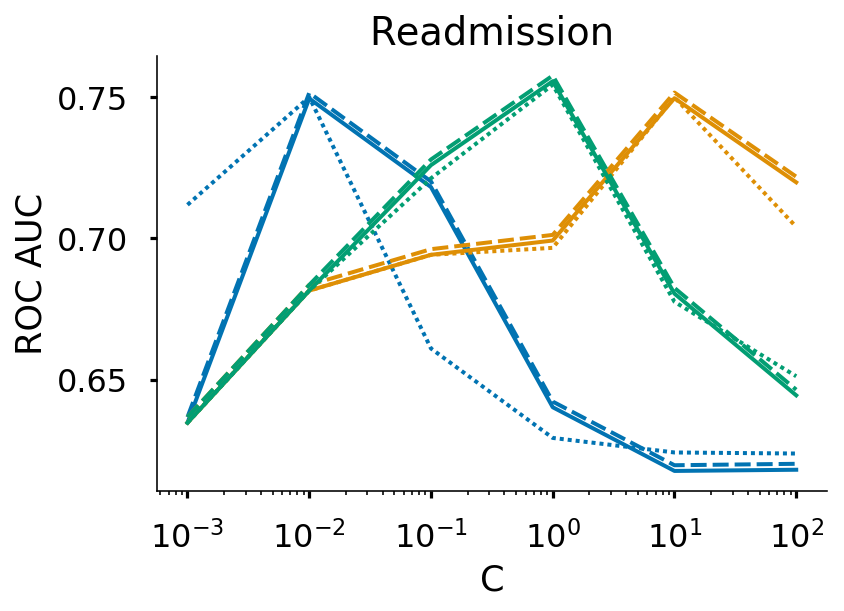

114
60
54


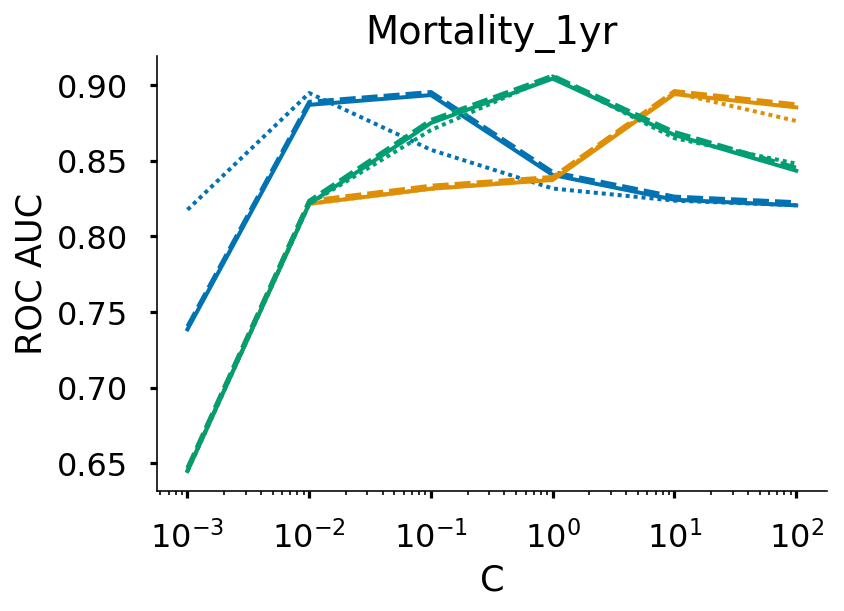

114
60
54


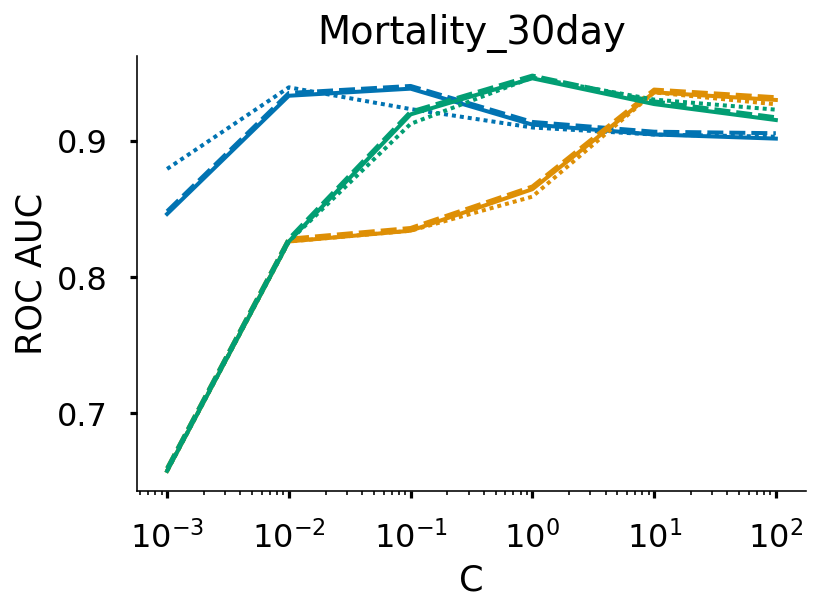

60
60
54


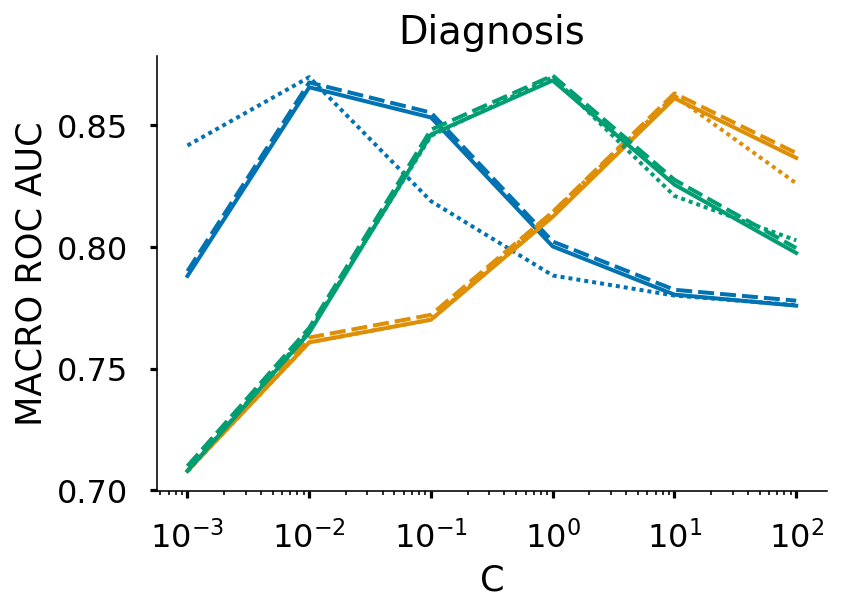

54
54
54


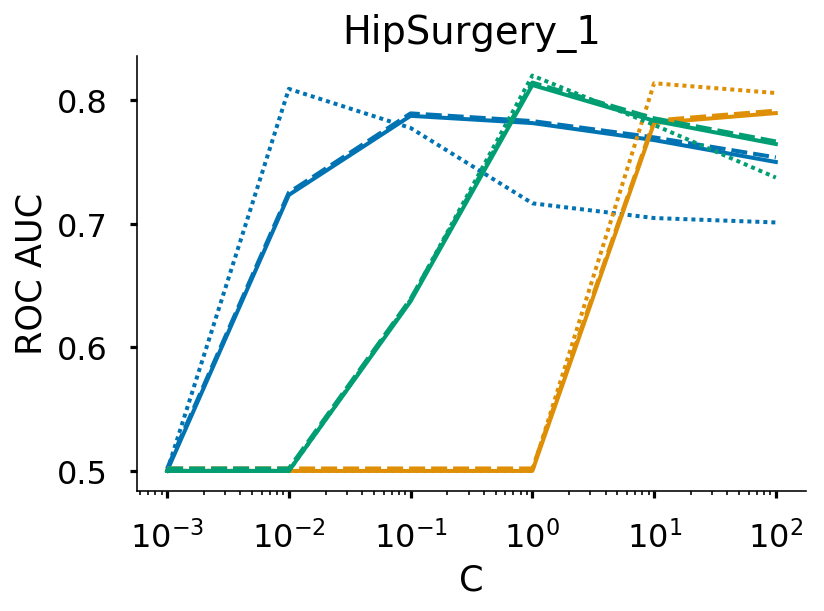

54
54
54


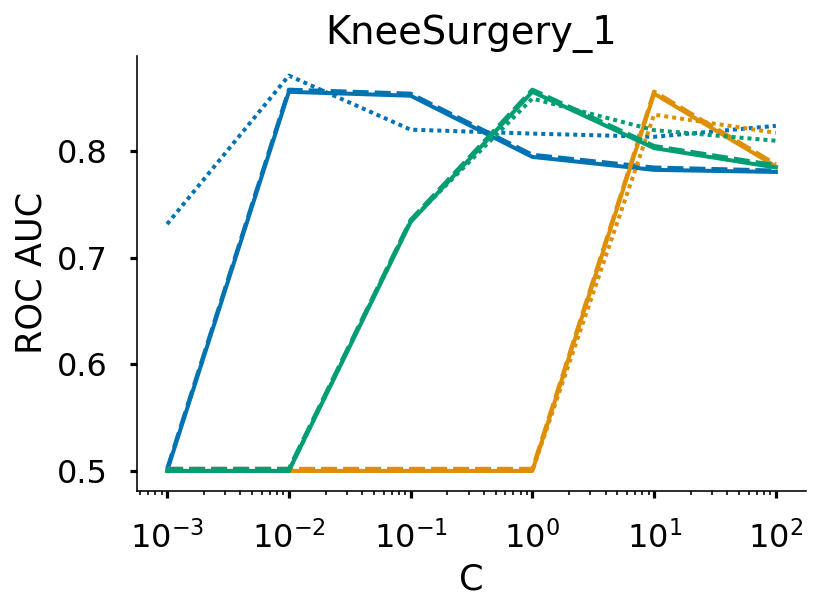

In [101]:
df = generate_plot('Readmission', 'roc_auc')
df = generate_plot('Mortality_1yr', 'roc_auc')
df = generate_plot('Mortality_30day', 'roc_auc')
df = generate_plot('Diagnosis', 'macro_roc_auc')
df = generate_plot('HipSurgery_1', 'roc_auc', structured=False)
df = generate_plot('KneeSurgery_1', 'roc_auc', structured=False)

54
54
54


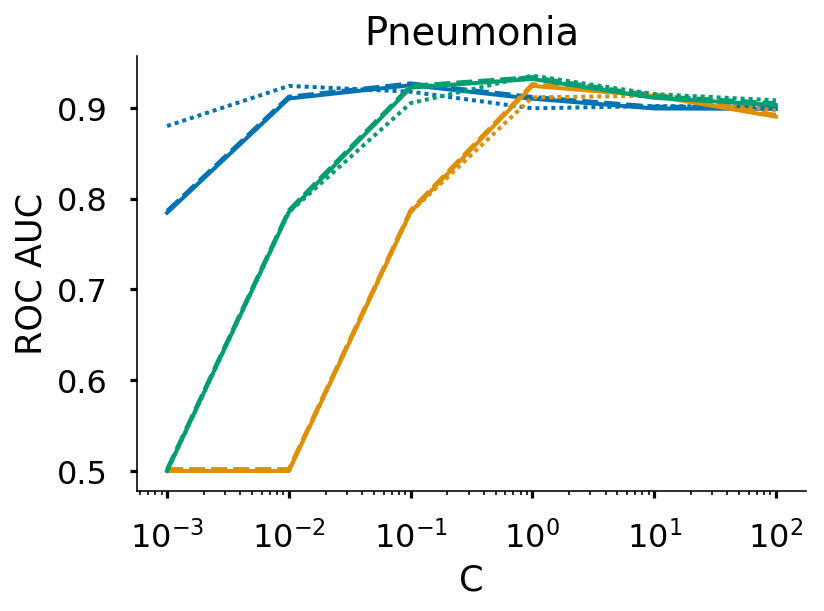

54
54
54


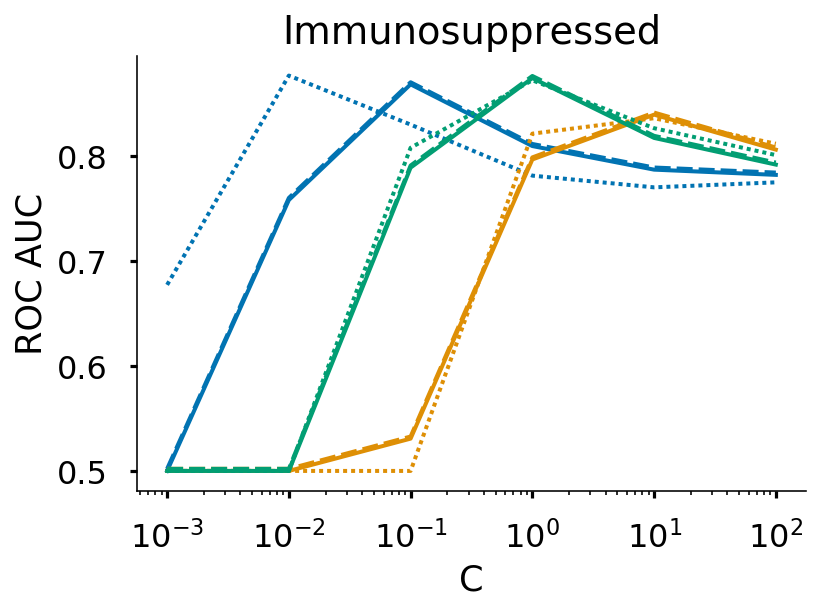

In [12]:
df = generate_plot('Pneumonia', 'roc_auc', structured=False)
df = generate_plot('Immunosuppressed', 'roc_auc', structured=False)